# U.S. Medical Insurance Costs

## 1 Introduction


This project will analyze the cost of medical treatment in the US. The purpose of the analysis is to find the main factors that affect the price of insurance. In addition, it is important to draw conclusions on what aspects of daily life can be improved to reduce insurance costs.

### 1.1 Importing relevant extensions

In [114]:
import pandas as pd
import pprint as pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

## 2. Data Exploration

Database import

In [115]:
db = pd.read_csv('insurance.csv')

Database preview

In [116]:
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The database consists of 7 columns and 1338 records. No empty cells were found. The database appears to be well prepared. Since the database was provided for educational purposes, it is cleaned. The database cleaning phase will be skipped.

### 2.1. Descriptive Statistics

Calculatig the following:
- mean
- median
- standard deviation
- quartiles

In [118]:
db.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


We can see that for age, bmi, children and charges we have some NaN cells in which no data is given. In the next section we will check whether the cells containing NaN are located within one or many records.

For the cell with gender and smoking there are two unique values, which suggests that the data in this column is correct. 

The Smoker cell could actually be a binary form, due to the fact that it either smokes - True, or does not - False. 


### 2.2 Visual Analysis

#### 2.2.1. Identifying Data Types

In order to choose the correct methods of data visualization, it is necessary to identify them first

In [119]:
db.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

|Variable  | Type                  |
|----------|-----------------------|
| Age      | Numerical Discrete    |
| Sex      | Categorical Binary    |
| BMI      | Numerical Continuous  |
| Children | Numerical Discrete    |
| Smoker   | Categorical Binary    |
| Region   | Categorical Nominal   |
| Charges  | Numerical Continuous  |


#### 2.3. Single Variable Analysis

##### Age and BMI

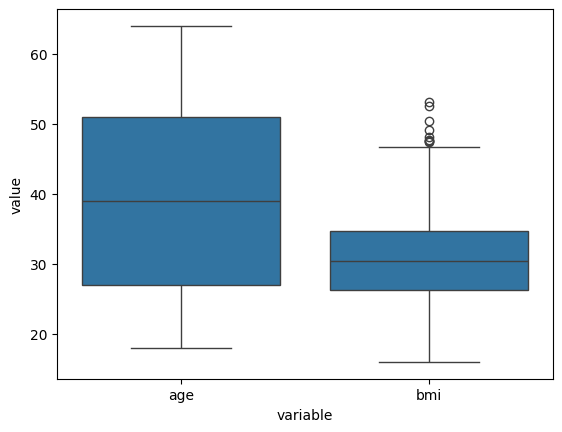

In [120]:
# It is necessary to transform to a "long" format using the pd.melt function so that each line corresponds to a single pomier with a specific variable ('age' or 'bmi') and its value.
df_long = pd.melt(db, value_vars=['age', 'bmi'], var_name='variable', value_name='value')

# Creating a boxplot chart
sns.boxplot(x='variable', y='value', data=df_long)
plt.show()


For the BMI column, there have been several values that could be considered atypical. For the BMI indicator, these cases lie in the group of overly obese people. This is likely.

<Axes: xlabel='age', ylabel='Count'>

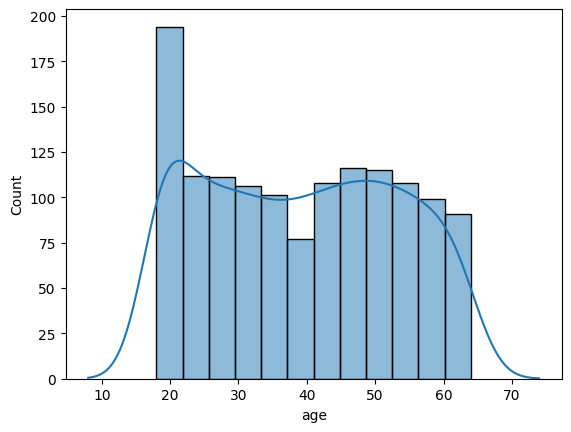

In [121]:
sns.histplot(db['age'], kde=True, kde_kws=dict(cut=3))

The histogram is actually flat and we have about 80-100 people for each age group, except for 20-somethings, who are twice as many. With such a large number of samples, twice as many 20-somethings will not disturb the results.

<Axes: xlabel='bmi', ylabel='Count'>

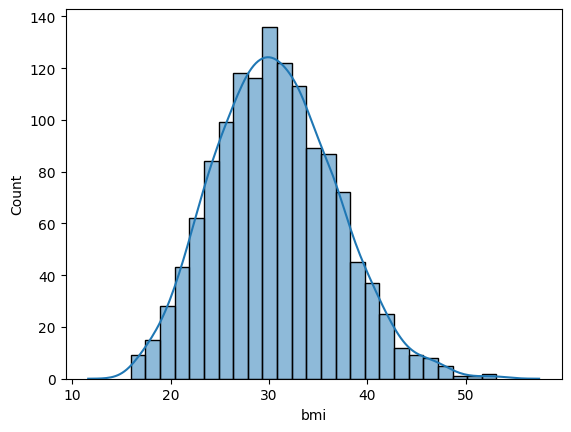

In [122]:
sns.histplot(db['bmi'], kde=True, kde_kws=dict(cut=3))

The BMI histogram is typical and shows an even distribution of people, colloquially speaking thin and overweight

##### Children

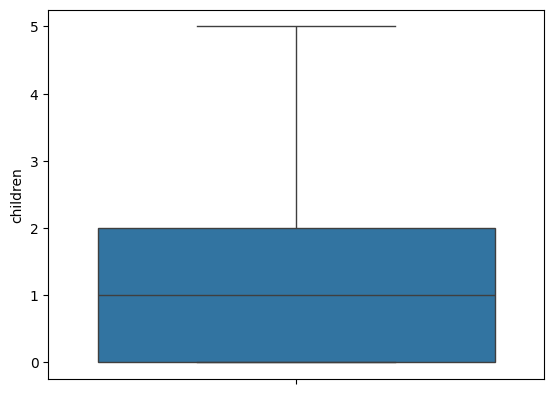

In [123]:
sns.boxplot(data = db, y='children')
plt.show()

<Axes: xlabel='children', ylabel='Count'>

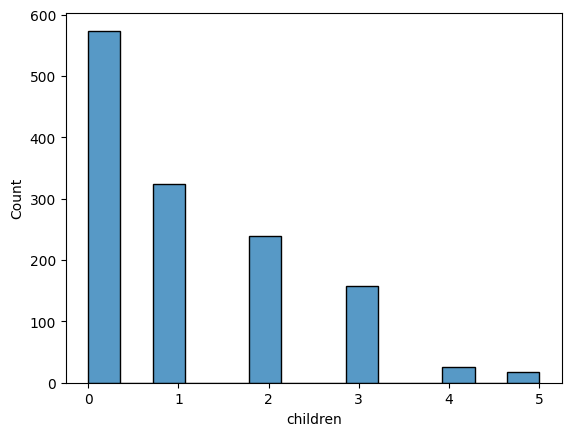

In [124]:
sns.histplot(db['children'])

The histogram of the number of children owned tells us that slightly less than half of the respondents do not have children. about the same number of people have from one to three children. The histogram collapses for those who have four and five children. For analyses taking the effect of the number of children and relating it to this group of people must be carefully verified, as the sample may be too small to make conclusions.

##### Region

In [125]:
list(db.region.unique())

['southwest', 'southeast', 'northwest', 'northeast']

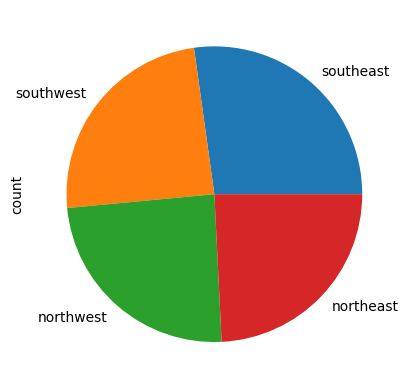

In [126]:
db.region.value_counts().plot.pie()
plt.show()
plt.close()

As we can see, the data is divided into 4 regions approximately in equal quarters. 

##### Charges

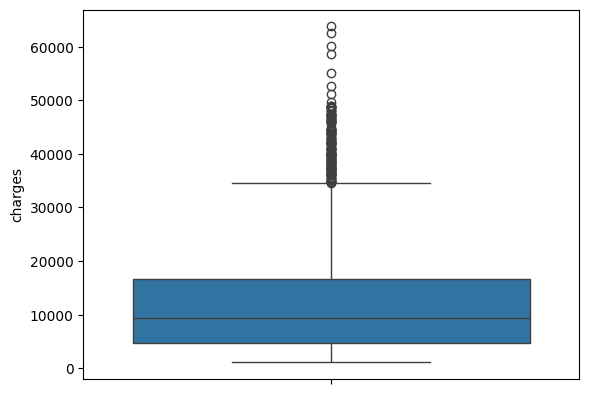

In [127]:
sns.boxplot(data = db, y= 'charges')
plt.show()

This chart shows that a huge number of people have excessively high insurance costs compared to other people. It should be determined what could be the reasons for this, i.e. which factors have the greatest impact on the price of insurance.

<Axes: xlabel='charges', ylabel='Count'>

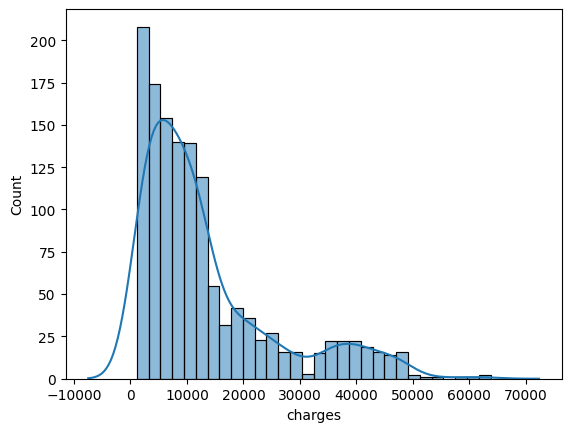

In [128]:
sns.histplot(db['charges'], kde=True, kde_kws=dict(cut=3))

The cost histogram is asymmetric with a strong tendency to the left - lower treatment costs. 

In this diagram, we see two inflection points:
1. at $30,000 where the numbers are very low
2. for costs above $50,000 - people with costs higher than this amount are exceptions.

<Axes: xlabel='charges', ylabel='Count'>

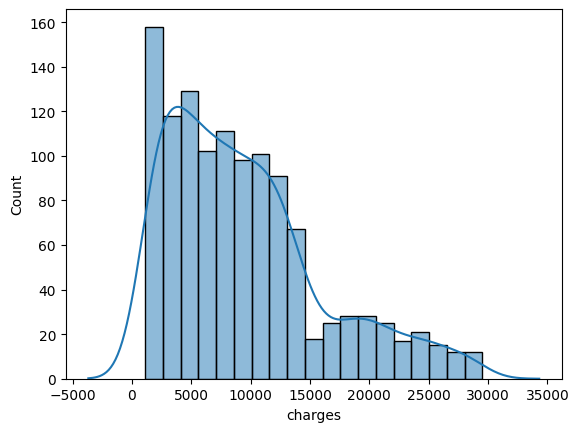

In [129]:
sns.histplot(db[db['charges'] < 30000].charges, kde=True, kde_kws=dict(cut=3))

When limiting the histogram to costs no higher than $30,000, the histogram still has an asymmetric tendency to the left, and reveals another small breakthrough - for the amount of $15,000. The number of people whose insurance costs are higher suddenly drops dramatically.

In conclusion, two points should be considered in further analysis: $15,000 and $30,000, and identify what factors contribute to the overrun of these two points

#### 2.4 Associations between Charges and Variables

Let's examine how the following factors affect the cost of insurance

##### Charges/Age

<Axes: xlabel='age', ylabel='charges'>

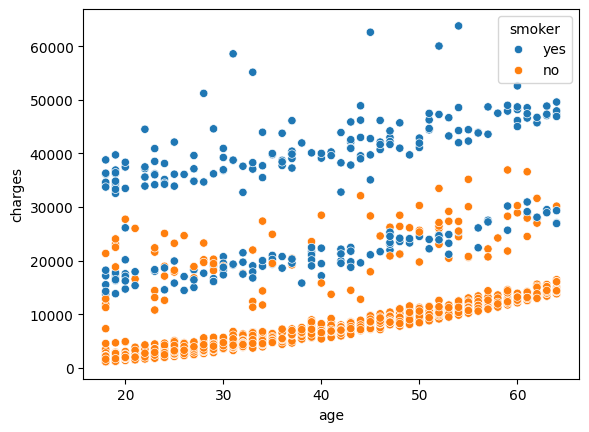

In [130]:
sns.scatterplot(data=db, x='age', y='charges',
                hue = 'smoker')

The above diagram allows us to draw the following conclusions:
1. insurance costs increase with the age of the insured person
2. Another parameter divides the diagram into 3 subgroups, which are represented by splitting the data into 3 parallel lanes. Applying an additional color, which further categorizes the data based on whether the insured is a smoker or not, proves that it was this factor that split the data. Thus, it is possible to put forward a theory that the fact of being a smoker significantly increases the cost of insurance

##### Charges/Sex

<Axes: xlabel='sex', ylabel='charges'>

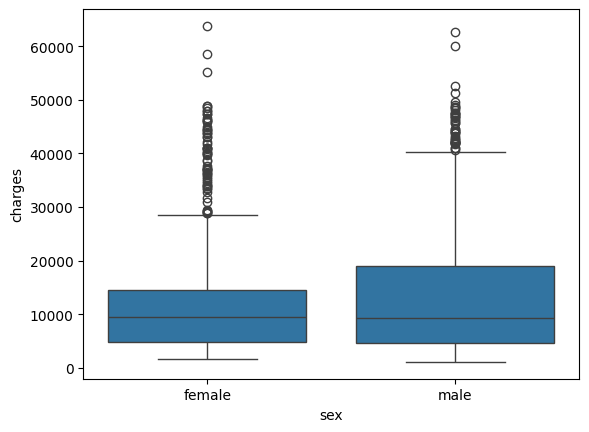

In [131]:
sns.boxplot(data=db, x='sex', y='charges')

Just as intuition suggests - average medical insurance costs have no relation to gender. Yet the data presents a much larger scatter for men than for women. Let's look at the data separately for both genders

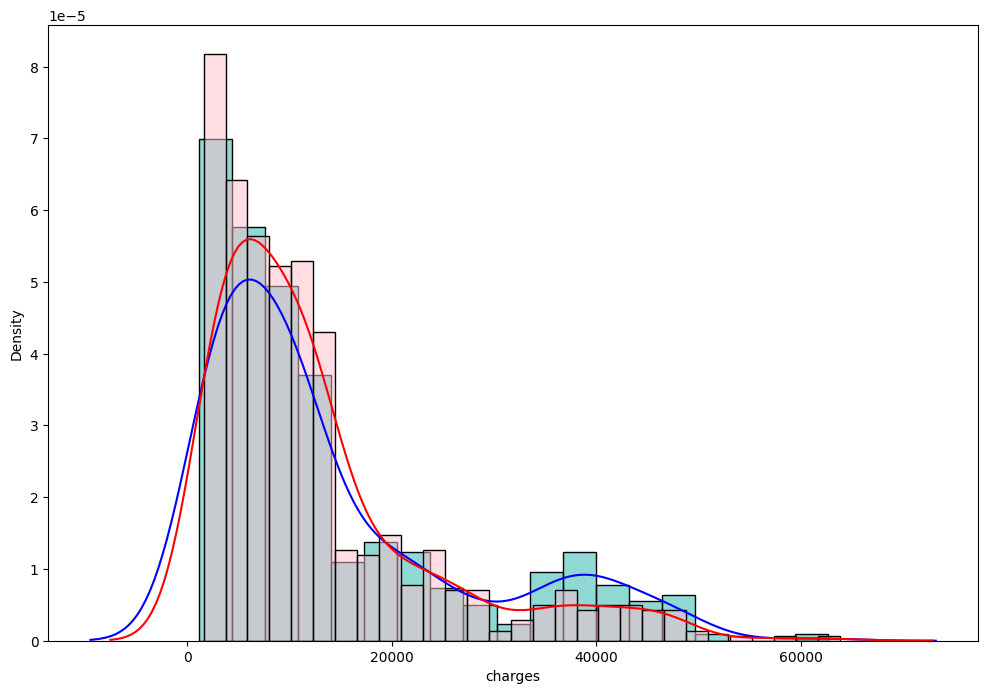

In [132]:
db_male = db[db['sex'] == 'male']
db_female = db[db['sex'] == 'female']

plt.figure(figsize=(12, 8))
sns.histplot(data=db_male, x='charges', kde=True, kde_kws=dict(cut=3), color='lightseagreen', label='male', stat='density', alpha=0.5).lines[0].set_color('blue')
sns.histplot(data=db_female, x='charges', kde=True, kde_kws=dict(cut=3), color='pink', label='female', stat='density', alpha=0.5).lines[1].set_color('red')

The histogram shows that the group of men above $30,000 is more numerous than women, and conversely, the number of women below the insurance amount of $15,000 is more numerous than men. Having already had experience with the influence of smokers on the data, let's test the hypothesis that men smoke more often than women

In [133]:
sex_smoker = pd.crosstab(db.sex, db.smoker)
sex_smoker

smoker,no,yes
sex,,
female,547,115
male,517,159


Female are slightly outnumbered by 44 male-smokers. But to be objective, let's perform Chi-2 analysis

In [134]:
chi2, pval, dof, expected = chi2_contingency(sex_smoker)

expected.round(0)

array([[526., 136.],
       [538., 138.]])

In [135]:
print(f'chi2 =  {chi2.round(3)}, pval = {pval.round(3)}, dof = {dof}')

chi2 =  7.393, pval = 0.007, dof = 1


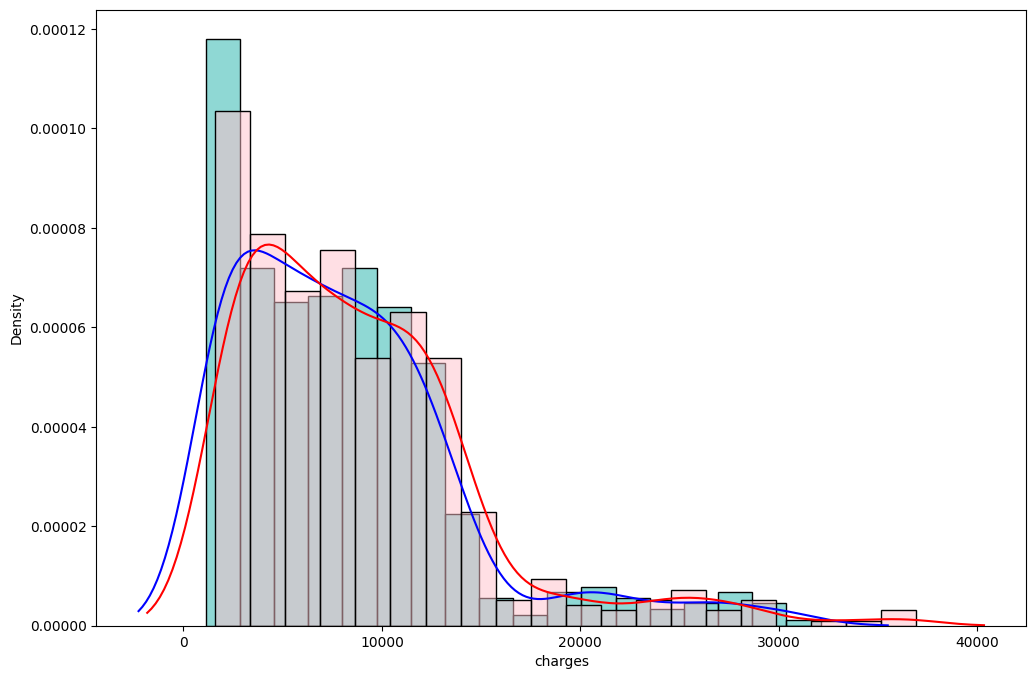

In [136]:
db_male_non_smokers = db[(db.sex == 'male') & (db.smoker == 'no')]
db_female_non_smokers = db[(db.sex == 'female' ) & (db.smoker == 'no')]

plt.figure(figsize=(12, 8))

sns.histplot(data=db_male_non_smokers, x='charges', kde=True, kde_kws=dict(cut=2), color='lightseagreen', label='male', stat='density', alpha=0.5,).lines[0].set_color('blue')
sns.histplot(data=db_female_non_smokers, x='charges', kde=True, kde_kws=dict(cut=2), color='pink', label='female', stat='density', alpha=0.5).lines[1].set_color('red')

As can be seen in the above diagram, removing the smoking factor, flattened the histories to almost two identical ones. This therefore confirms the thesis that health insurance costs are not gender-specific, and that the differences on the boxplot are due to the effect of smoking on health insurance costs

Charges/BMI

<Axes: xlabel='bmi', ylabel='charges'>

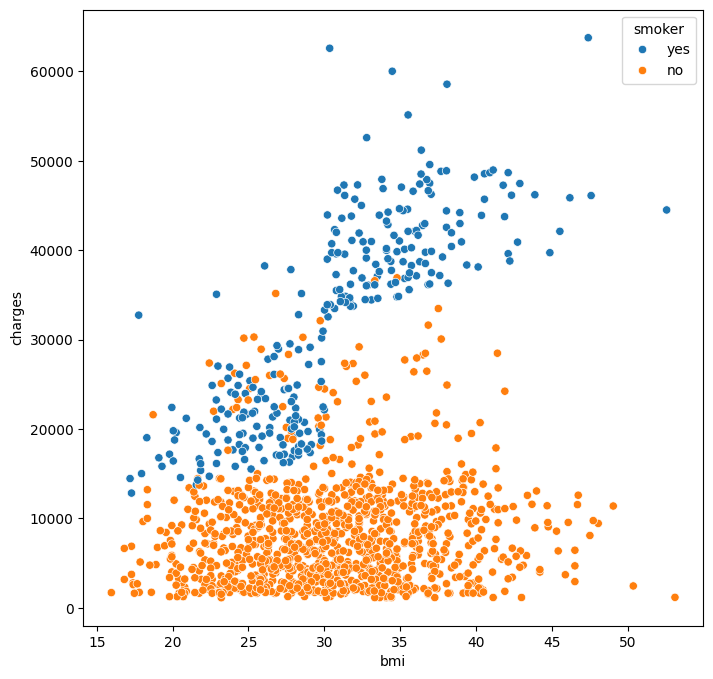

In [137]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=db, x='bmi', y='charges', hue= 'smoker')

The diagram splits into a rather dense cloud up to an amount of about $15,000, which already drew our attention earlier. From this amount, a second cloud of points is formed, which has an ascending tendency. Applying to this graph again the categorization of whether a person is a smoker makes it possible to understand why this diagram has split into two clouds. In addition, the first hypothesis can be made, that not being a smoker results in not exceeding the $15,000 insurance cost in most cases

The orange cloud, which applies to non-smokers, is quasi-flat. This means that bmi, for this group, has no impact on insurance costs.

The blue cloud, which applies to smokers, has an upward trend, suggesting that bmi, for this group, has an impact on insurance costs. These increase with increasing BMI, and therefore the degree of overweight

##### Charges/Children

<Axes: xlabel='smoker', ylabel='charges'>

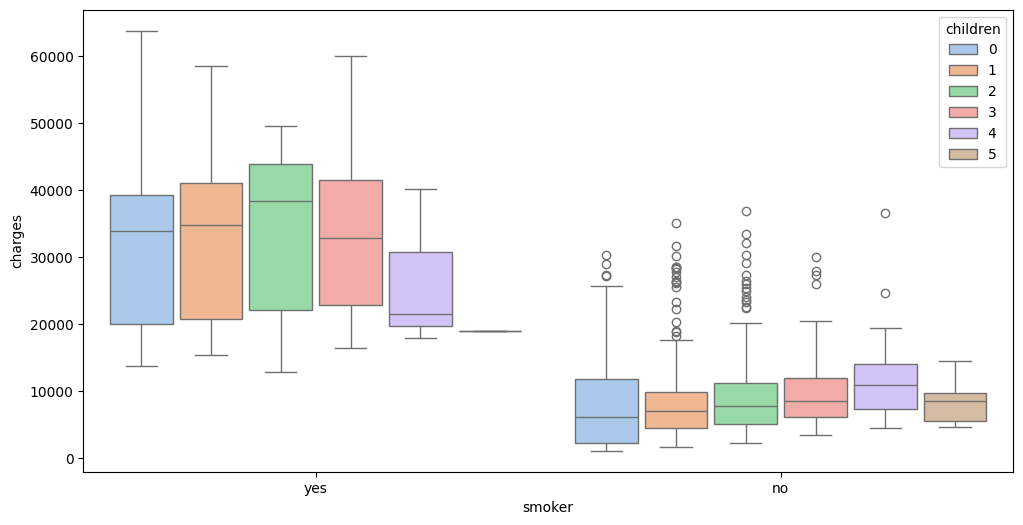

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=db, hue='children', y='charges' , palette='pastel', gap = 1.9, x='smoker' ,  width= 0.9)

This boxplot shows the distribution of the variable 'charges' for two groups: smokers (described as 'yes') and non-smokers (described as 'no'). The X-axis is divided into these two groups, and the Y-axis shows the values of the 'charges' variable.

Each boxplot corresponds to the number of children, which is represented by colors on the legend (from 0 to 5 children). The 'charges' values are apparently higher for smokers regardless of the number of children, indicating that smoking has an impact on the charges.

For smokers:
- The median (line inside the box) is usually between 30,000 and 40,000.
- The quartile range (height of the box) is fairly consistent, but the bottom quartile (bottom of the box) is slightly lower for groups with more children.
- Outliers (single points outside the 'whiskers') occur, indicating significant values of 'charges' different from most of the data.

For non-smokers:
- The median of each box is much lower, usually below 10,000.
- The quartile range is smaller, indicating less variability in 'charges' among non-smokers.
- A few outliers have appeared, but they are much rarer and lower than in the smoking group.

So the chart shows that smoking is associated with higher charges, and that this trend is constant regardless of the number of children.

##### Charges/Smoker

<Axes: ylabel='charges'>

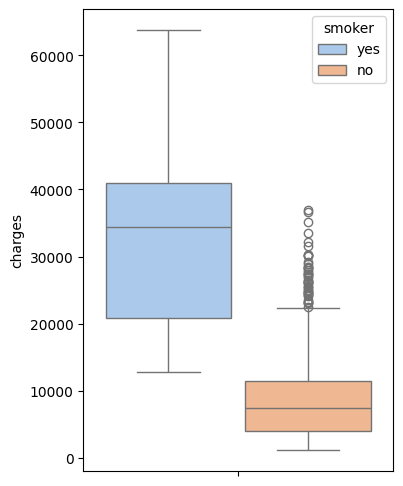

In [139]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=db, hue='smoker', y='charges' , palette='pastel', legend = True, gap = 1.9 ,  width= 0.9)

According to earlier conclusions, being or not being a smoker has an opgromous impact on health insurance costs. In the example shown, the bottom whisker is above Q3 for non-smokers. 
However, in the box representing non-smokers, one can see a fair amount of outlier amounts. We can conclude that one more parameter has a significant impact on the cost of health insurance. We will return to this topic later

##### Charges/Region

<Axes: ylabel='charges'>

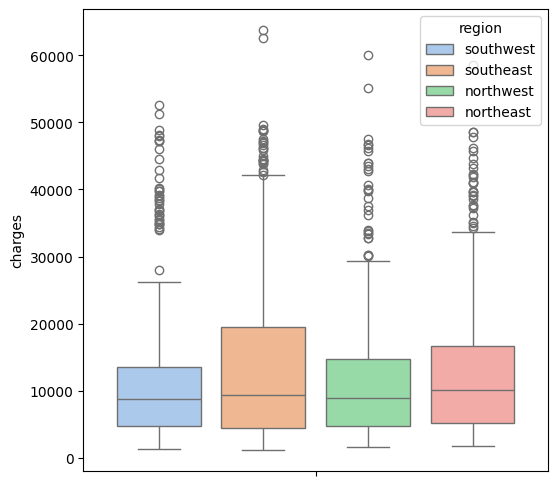

In [140]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=db, hue='region', y='charges' , palette='pastel', legend = True, gap = 1.8 ,  width= 0.9)

The average value for all regions is the same, but the Top Whikers and Q3 differ significantly from each other. Let's see how it looks on the histogram

C:\Users\DataScience\AppData\Local\Temp\ipykernel_38592\1457847411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_charges['region'] = codes


<Axes: xlabel='charges', ylabel='Count'>

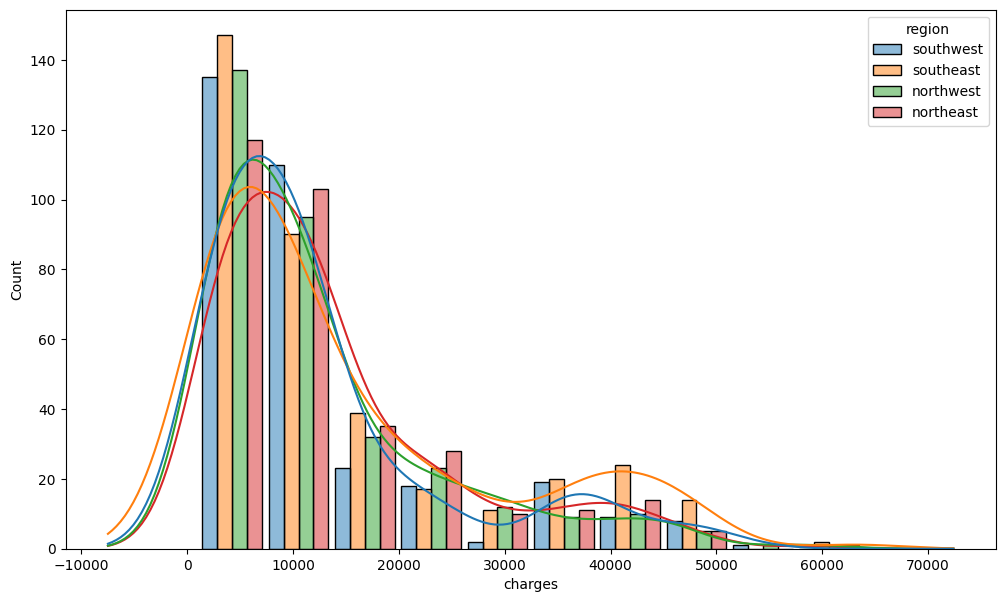

In [141]:
codes, unique = pd.factorize(db['region'], sort = True)
region_charges = db[['region','charges']]
region_charges['region'] = codes

plt.figure(figsize=(12, 7))
sns.histplot(data=db, x='charges', hue='region', multiple='dodge', shrink=0.9, bins = 10, kde=True, kde_kws=dict(cut=3))

The hitogram reveals that there are differences between regions. The Southeast region has more people with cheaper health insurance as for the Northeast region. On the other hand, the Southeast region has more offers in the $30,000-$50,000 range of all regions. The northern regions are characterized by a smoother transition from cheap to expensive offers. the Northwest region in particular has recorded virtually no offers in the $30,000 range.

<Axes: xlabel='charges', ylabel='Density'>

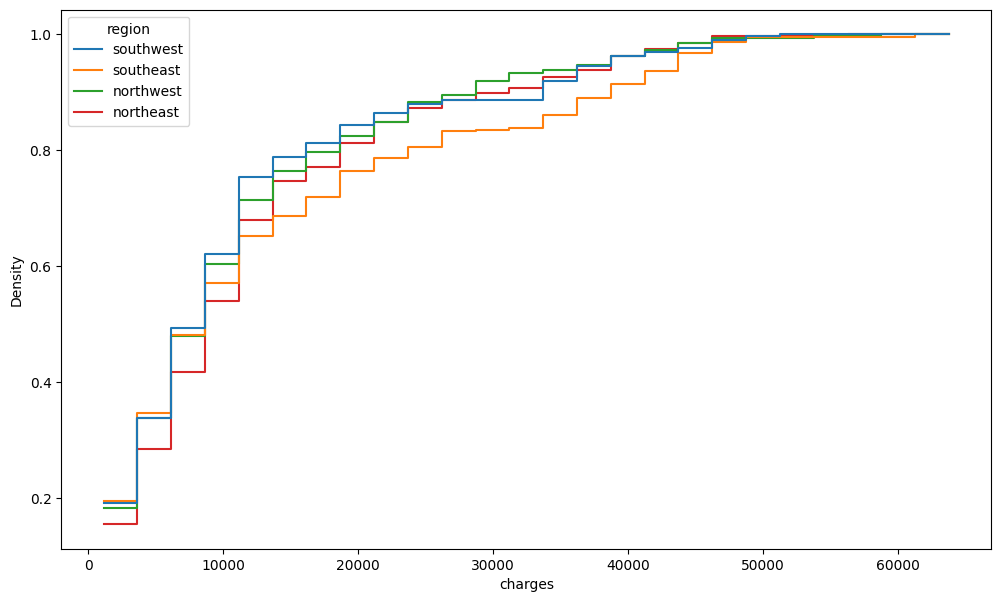

In [142]:
plt.figure(figsize=(12, 7))
sns.histplot(data=db, x='charges', hue='region', element='step', fill=False,
    cumulative=True, stat="density", common_norm=False, bins=25)

A cumulative chart will make it easier to assess how the number of offers from the cheapest to the most expensive is growing. This chart can be a bit unintuitive. The faster a region reaches 1.0 - the better. This means that the maximum density was reached faster, using cheaper offers. 
And so you can clearly see that the South East region will begin to diverge from the rest of the regions at about $15,000. It can be inferred that this region is generally more expensive than the other regions.
Up to the level of about $30,000, the South West region looks the best. After that, we see a "polish" at this level, which was also seen on the histogram in the form of a low number of people with this amount of health insurance costs. From the level of about $40,000 it no longer deviates particularly from other regions.
The Northeast region presents the least low insurance offers, to be slightly ahead of the other regions in the range of $15,000 - $30,000.
Excluding the South East region, regional differences are minimal. However significant they may be, they are not leading.


<Axes: xlabel='region', ylabel='charges'>

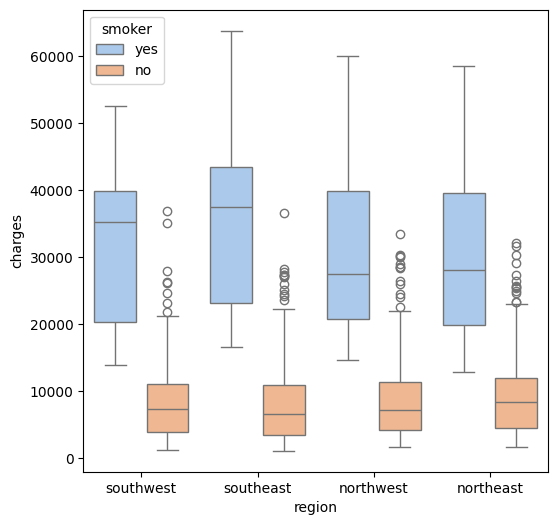

In [143]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=db, hue='smoker', x='region', y='charges' , palette='pastel', legend = True, gap = 1.8 ,  width= 0.9)

On the posher Boxplot, it can be seen that smokers in the midwestern regions pay more on average than in the northern regions. The South East region in particular seems to be the least smoker-friendly.

In [144]:
#Encoding Categorical Data
db_encoded = db.copy()

codes, unique = pd.factorize(db['region'], sort = True)
db_encoded['region'] = codes

codes, unique = pd.factorize(db['sex'], sort = True)
db_encoded['sex'] = codes

codes, unique = pd.factorize(db['smoker'], sort = True)
db_encoded['smoker'] = codes

In [145]:
#inna metoda
census['marital_status'] = pd.Categorical(census['marital_status'], ['married', 'single', 'divorced', 'widowed'], ordered=False)

census['marital_status'] = census['marital_status'].cat.codes

NameError: name 'census' is not defined

Init signature:
pd.Categorical(
    values,
    categories=None,
    ordered=None,
    dtype: 'Dtype | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
    copy: 'bool' = True,
) -> 'None'
Docstring:     
Represent a categorical variable in classic R / S-plus fashion.

`Categoricals` can only take on a limited, and usually fixed, number
of possible values (`categories`). In contrast to statistical categorical
variables, a `Categorical` might have an order, but numerical operations
(additions, divisions, ...) are not possible.

All values of the `Categorical` are either in `categories` or `np.nan`.
Assigning values outside of `categories` will raise a `ValueError`. Order
is defined by the order of the `categories`, not lexical order of the
values.

Parameters
----------
values : list-like
    The values of the categorical. If categories are given, values not in
    categories will be replaced with NaN.
categories : Index-like (unique), optional
    The unique categorie

<Axes: >

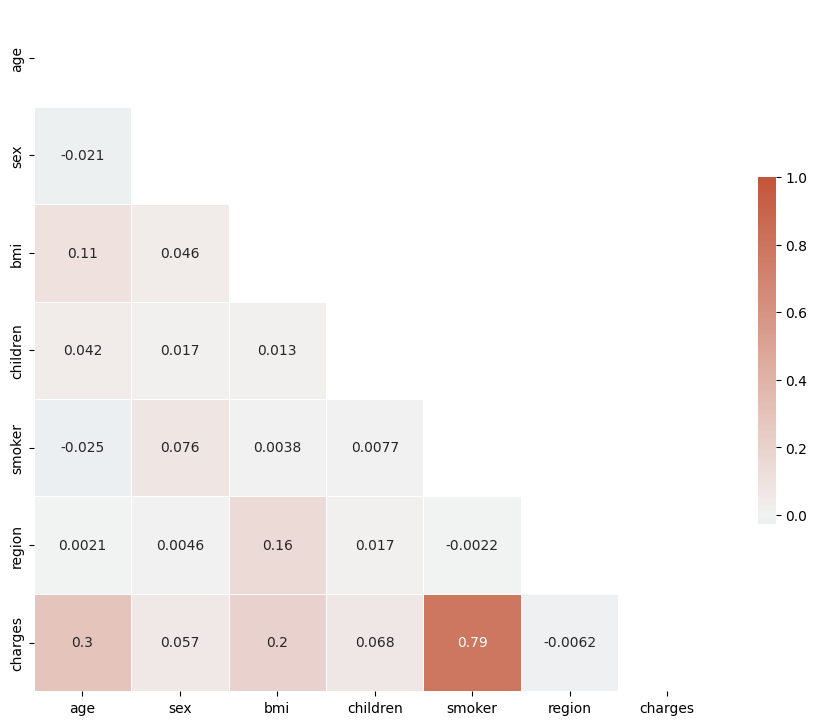

In [112]:
# Compute the correlation matrix
corr = db_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            )

### -------------- END --------------

1. Data Exploration:
Descriptive Statistics:
Begin by calculating basic descriptive statistics for each variable (mean, median, standard deviation, etc.) to understand the central tendency and variability in the data.
Data Visualization:
Create visualizations such as histograms, box plots, and scatter plots to visually explore the distribution and relationships between variables.
2. Data Cleaning:
Missing Values:
Identify and handle missing values. You may impute missing values based on the context or choose to remove rows or columns with missing data.
Outliers:
Detect and address outliers that might skew your analysis. This can be done using visualizations or statistical methods.
3. Feature Engineering:
Create Derived Features:
Generate new features that might be relevant for the analysis, such as creating a BMI category or calculating the total number of dependents.
Encoding Categorical Variables:
If your data includes categorical variables (like gender), encode them numerically for machine learning models.
4. Statistical Analysis:
Correlation Analysis:
Calculate correlation coefficients to understand the relationships between continuous variables (e.g., age, BMI) and the target variable (insurance costs).
Chi-square Test:
Use the chi-square test for independence to analyze relationships between categorical variables.
ANOVA:
Perform analysis of variance (ANOVA) to understand if there are significant differences in insurance costs across different categories (e.g., age groups, BMI categories).